# **PART A**

---



## 1. Data import and Understanding [10 Marks]


### A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]


In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Activation, Dense
from keras import optimizers, regularizers
from tensorflow.keras.layers import BatchNormalization, Dropout
#Call the sklearn librart and import scaler values
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 10
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepLearning/NN Project Data - Signal.csv")

In [4]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [6]:
data.shape

(1599, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### B. Check for missing values and print percentage for each attribute. [2 Marks]


In [5]:
# check for missing values
missing_values = data.isnull().sum().any()

# print the number of missing values of each variable
print(missing_values)

#There are no missing values in the data

False


### C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]


In [8]:
#There are 240 duplicate rows in the data
data.duplicated().sum()

240

In [9]:
#drop the duplicate rows
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [10]:
data.shape

(1359, 12)

In [11]:
data.duplicated().sum()

0

### D. Visualise distribution of the target variable. [2 Marks]


In [21]:
data["Signal_Strength"].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

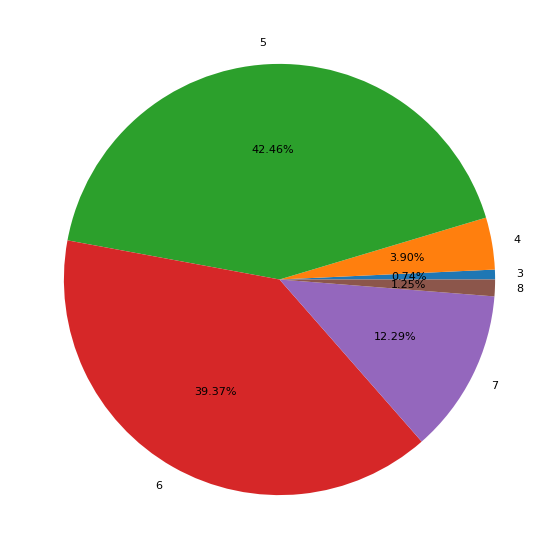

In [12]:
plt.figure(figsize=(7, 7))
# filter df and plot 'i' on the new subplot axis
data.groupby("Signal_Strength").size().plot(kind='pie', autopct='%.2f%%')
plt.show()

### E. Share insights from the initial data analysis (at least 2). [2 Marks]

1. Data will have to be scaled as all the columns are in different scales
2. Data for target column is imbalanced.

## 2. Data preprocessing [7 Marks]


### A. Split the data into X & Y. [1 Marks]


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(['Signal_Strength'], axis=1)
y= data['Signal_Strength']
X.shape

(1359, 11)

### B. Split the data into train & test with 70:30 proportion.[1 Marks]


In [15]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X,y, test_size=0.3,  stratify=y, shuffle = True, random_state= True)

### C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]


In [16]:
print(X_train_a.shape)
print(X_test_a.shape)
print(y_train_a.shape)
print(y_test_a.shape)


(951, 11)
(408, 11)
(951,)
(408,)


### D. Normalise the train and test data with appropriate method. [2 Marks]


In [17]:
#before normalising we will use SMOTe to balance the data
# import library for balancing the data using SMOTE.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_a_sm, y_train_a_sm = smote.fit_resample(X_train_a, y_train_a) # Fit the data for sampling

In [18]:

#Call the sklearn librart and import scaler values
from sklearn.preprocessing import StandardScaler

#call the standard scaler
std_scaler = StandardScaler()

#fit the values to the function
X_train_a_scaled = pd.DataFrame(std_scaler.fit_transform(X_train_a_sm), columns= X_train_a_sm.columns)
X_train_a_scaled.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,1.43,-0.26,0.89,0.01,-0.42,-0.90,-0.34,1.93,-1.70,-0.18,-1.00
1,0.20,-0.73,0.58,-0.26,-0.28,0.66,0.57,0.77,0.81,-0.18,-1.26
2,-1.46,0.75,-0.96,0.10,-0.89,-0.01,-0.34,-1.66,1.64,-1.15,1.14
3,0.01,-1.30,1.40,-0.62,0.03,2.45,2.44,0.16,-0.09,0.58,-0.11
4,-1.09,-1.30,-0.04,-0.08,-1.85,2.56,2.33,-3.31,-0.35,-1.91,0.96


In [19]:
X_test_a_scaled= pd.DataFrame(std_scaler.transform(X_test_a ), columns= X_test_a.columns)
X_test_a_scaled.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,2.10,-0.73,1.86,-0.30,-0.53,-0.68,-0.34,1.21,-1.63,0.10,0.61
1,-0.29,-1.44,0.73,-0.71,-0.56,1.00,0.50,-1.12,0.42,-0.46,1.14
2,2.59,0.21,1.04,0.28,-0.37,-0.90,-0.63,1.54,-1.12,-0.66,0.70
3,-0.11,-0.08,-0.24,0.82,-0.35,0.33,2.76,0.55,-0.28,-0.39,-1.09
4,-1.15,0.79,-1.01,2.71,0.62,-0.46,-0.71,-0.04,0.23,-1.22,0.16


In [20]:
print(X_train_a_scaled.shape)
print(X_test_a_scaled.shape)

(2424, 11)
(408, 11)


### E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [21]:
# converting y data into categorical (one-hot encoding)
y_train_1 = to_categorical(y_train_a_sm)
y_test_1 = to_categorical(y_test_a)

In [22]:
print(X_train_a_scaled.shape, X_test_a_scaled.shape, y_train_1.shape, y_test_1.shape)

(2424, 11) (408, 11) (2424, 9) (408, 9)


## 3. Model Training & Evaluation using Neural Network [13 Marks]


### A. Design a Neural Network to train a classifier. [3 Marks]


In [23]:
def createModel(X_train, initalNeurons,initialDropOut, layers, learningRate, activationFunction, outputNeurons=9):

  model = tf.keras.models.Sequential()
  model.add(Dense(initalNeurons, input_shape = (X_train.shape[1], ), kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(initialDropOut))

  for layer in layers:
    model.add(Dense(layer[0], kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(layer[1]))

  model.add(Dense(outputNeurons, kernel_initializer='he_normal'))
  model.add(Activation('softmax'))
  optimiser =optimizers.Adam(learning_rate =learningRate)

  match activationFunction:
    case 'SGD':
      optimiser = optimizers.SGD(learning_rate =learningRate)


  model.compile(optimizer = optimiser, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model



In [24]:
def TestModels(X_train,y_train,X_test, y_test, models, batchSize, epochs, valdiationPercentage, callback,verbose=0):
  history=[]
  results=[]
  counter=1
  for modelDetail in models:
    model= modelDetail.get("model")
    modelName=modelDetail.get("modelName")
    history.append(model.fit(X_train, y_train, batch_size = batchSize, epochs = epochs, verbose = verbose, validation_split=valdiationPercentage,  callbacks=[callback]))

    print ("\n"+'#'*30 + modelName + " Batch Size: " + str(batchSize) + " Epochs: " + str(epochs) + " valdiationPercentage:" + str(valdiationPercentage) +'#'*30+"\n")
    results.append(history)
    model.evaluate(X_test, y_test)
    counter=counter+1
  return history


In [25]:
callback  = keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [35]:
models=[]
Layers=[]
models.append({'modelName':'InitalModel','model':createModel (X_train_a_scaled, 20,0 ,Layers, 0.001, 'SGD')})

### B. Train the classifier using previously designed Architecture [2 Marks]

In [36]:
result = TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models, 100, 200, 0.1, callback, 0)


##############################InitalModel Batch Size: 100 Epochs: 200 valdiationPercentage:0.1##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.5640 - accuracy: 0.3897


### C. Plot 2 separate visuals. [3 Marks]
i. Training Loss and Validation Loss
ii. Training Accuracy and Validation Accuracy


In [64]:
def plotGraphs (history):
  plt.figure(figsize=(10, 4))
  noOfEpochs = len(history.history['loss'])

  #Loss plot
  plt.subplot(1, 2, 1)
  ax=sns.lineplot(y = history.history['loss'], x = range(0, noOfEpochs, 1), label = "Training Loss", color='red')
  ax=sns.lineplot(y = history.history['val_loss'], x = range(0, noOfEpochs, 1), label = "Validation Loss", color='blue')
  plt.xlabel('Ephochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Training and Valdiation Loss Vs Epochs')
  #plt.show()


  #Accuracy plot
  plt.subplot(1, 2, 2)
  ax=sns.lineplot(y = history.history['accuracy'], x = range(0, noOfEpochs, 1), label = "Training Accuracy", color='green')
  ax=sns.lineplot(y = history.history['val_accuracy'], x = range(0, noOfEpochs, 1), label = "Validation Accuracy", color='orange')
  plt.xlabel('Ephochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Valdiation Accuracy Vs Epochs')
  plt.tight_layout()
  plt.show()

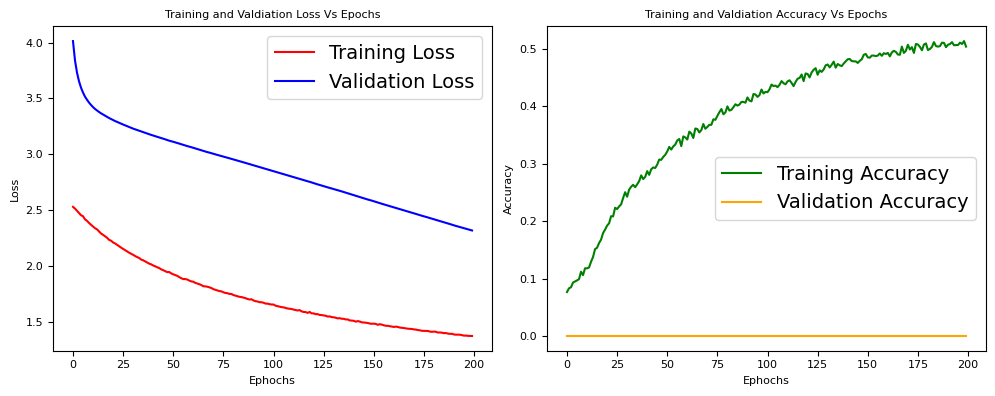

In [38]:
plotGraphs(result[0])

### D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]


In [39]:
models_2=[]
Layers_1=[[50,0.2]]
models_2.append({'modelName':'M1_1Layer_50_SGD','model':createModel (X_train_a_scaled, 50,0.2 ,Layers_1, 0.001, 'SGD')})
models_2.append({'modelName':'M2_1Layer_50_ADAM','model':createModel (X_train_a_scaled, 50,0.2 ,Layers_1, 0.001, 'ADAM')})
Layers_2=[[50,0.2],[40,0.2]]
models_2.append({'modelName':'M3_2Layer_50_40_SGD','model':createModel (X_train_a_scaled, 50,0.2 ,Layers_2, 0.001, 'SGD')})
models_2.append({'modelName':'M4_2Layer_50_40_ADAM','model':createModel (X_train_a_scaled, 50,0.2 ,Layers_2, 0.001, 'ADAM')})
Layers_3=[[50,0.2],[40,0.2],[30,0.2]]
models_2.append({'modelName':'M5_3Layer_50_40_30_SGD','model':createModel (X_train_a_scaled, 50,0.2 ,Layers_3, 0.001, 'SGD')})
models_2.append({'modelName':'M6_3Layer_50_40_30_ADAM','model':createModel (X_train_a_scaled, 50,0.2 ,Layers_3, 0.001, 'ADAM')})

results2=[]

results2.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_2, 50, 1000, 0.1, callback))
results2.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_2, 100, 1000, 0.1, callback))
results2.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_2, 50, 1000, 0.2, callback))
results2.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_2, 100, 1000, 0.2, callback))
results2.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_2, 150, 1000, 0.1, callback))
results2.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_2, 250, 1000, 0.1, callback))


##############################M1_1Layer_50_SGD Batch Size: 50 Epochs: 1000 valdiationPercentage:0.1##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.6131 - accuracy: 0.3824

##############################M2_1Layer_50_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.1##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.3758 - accuracy: 0.4657

##############################M3_2Layer_50_40_SGD Batch Size: 50 Epochs: 1000 valdiationPercentage:0.1##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.6728 - accuracy: 0.3064

##############################M4_2Layer_50_40_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.1##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.3358 - accuracy: 0.4877

##############################M5_3Layer_50_40_30_SGD Batch Size: 50 Epochs: 1000 valdiationPercentage:0.1##########

In [40]:
models_3=[]
models_3.append({'modelName':'M1_1Layer_30_30_ADAM','model':createModel (X_train_a_scaled, 30,0.2 ,[[30,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M2_1Layer_30_50_ADAM','model':createModel (X_train_a_scaled, 30,0.2 ,[[50,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M3_1Layer_30_80_ADAM','model':createModel (X_train_a_scaled, 30,0.2 ,[[80,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M1_1Layer_50_30_ADAM','model':createModel (X_train_a_scaled, 50,0.2 ,[[30,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M2_1Layer_50_50_ADAM','model':createModel (X_train_a_scaled, 50,0.2 ,[[50,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M3_1Layer_50_80_ADAM','model':createModel (X_train_a_scaled, 50,0.2 ,[[80,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M1_1Layer_80_30_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[30,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M2_1Layer_80_50_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[50,0.2]], 0.001, 'ADAM')})
models_3.append({'modelName':'M3_1Layer_80_80_ADAM','model':createModel (X_train_a_scaled, 0,0.2 ,[[80,0.2]], 0.001, 'ADAM')})

results3=[]

results3.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_3, 50, 1000, 0.2, callback))
results3.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_3, 100, 1000, 0.2, callback))
results3.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_3, 150, 1000, 0.2, callback))
results3.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_3, 200, 1000, 0.2, callback))
results3.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_3, 250, 1000, 0.2, callback))
results3.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_3, 300, 1000, 0.2, callback))


##############################M1_1Layer_30_30_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 3ms/step - loss: 1.1623 - accuracy: 0.5000

##############################M2_1Layer_30_50_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.1758 - accuracy: 0.4779

##############################M3_1Layer_30_80_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.1566 - accuracy: 0.5172

##############################M1_1Layer_50_30_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.2236 - accuracy: 0.5098

##############################M2_1Layer_50_50_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2####

In [41]:
models_4=[]
models_4.append({'modelName':'M1_1Layer_70_20_ADAM','model':createModel (X_train_a_scaled, 70,0.2 ,[[20,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M2_1Layer_70_30_ADAM','model':createModel (X_train_a_scaled, 70,0.2 ,[[30,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M3_1Layer_70_50_ADAM','model':createModel (X_train_a_scaled, 70,0.2 ,[[50,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M4_1Layer_70_80_ADAM','model':createModel (X_train_a_scaled, 70,0.2 ,[[80,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M5_1Layer_70_100_ADAM','model':createModel (X_train_a_scaled, 70,0.2 ,[[100,0.2]], 0.001, 'ADAM')})

models_4.append({'modelName':'M6_1Layer_80_20_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[20,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M7_1Layer_80_30_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[30,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M8_1Layer_80_50_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[50,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M9_1Layer_80_80_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[80,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M10_1Layer_80_100_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[100,0.2]], 0.001, 'ADAM')})

models_4.append({'modelName':'M11_1Layer_100_20_ADAM','model':createModel (X_train_a_scaled, 70,0.2 ,[[20,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M12_1Layer_100_30_ADAM','model':createModel (X_train_a_scaled, 100,0.2 ,[[30,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M13_1Layer_100_50_ADAM','model':createModel (X_train_a_scaled, 100,0.2 ,[[50,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M14_1Layer_100_80_ADAM','model':createModel (X_train_a_scaled, 100,0.2 ,[[80,0.2]], 0.001, 'ADAM')})
models_4.append({'modelName':'M15_1Layer_100_100_ADAM','model':createModel (X_train_a_scaled, 100,0.2 ,[[100,0.2]], 0.001, 'ADAM')})

results4=[]

results4.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_4, 50, 1000, 0.2, callback))
results4.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_4, 100, 1000, 0.2, callback))
results4.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_4, 150, 1000, 0.2, callback))
results4.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_4, 200, 1000, 0.2, callback))
results4.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_4, 250, 1000, 0.2, callback))
results4.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_4, 300, 1000, 0.2, callback))


##############################M1_1Layer_70_20_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 3ms/step - loss: 1.1597 - accuracy: 0.4951

##############################M2_1Layer_70_30_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.1874 - accuracy: 0.4755

##############################M3_1Layer_70_50_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.2000 - accuracy: 0.4902

##############################M4_1Layer_70_80_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 3ms/step - loss: 1.1876 - accuracy: 0.4828

##############################M5_1Layer_70_100_ADAM Batch Size: 50 Epochs: 1000 valdiationPercentage:0.2###

In [42]:
models_5=[]

models_5.append({'modelName':'M2_1Layer_80_50_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[50,0.2]], 0.01, 'ADAM')})
models_5.append({'modelName':'M2_1Layer_80_50_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[50,0.3]], 0.001, 'ADAM')})
models_5.append({'modelName':'M3_1Layer_80_50_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[50,0.2]], 0.0001, 'ADAM')})

results5=[]
results5.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_5, 100, 1000, 0.2, callback))
results5.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_5, 150, 1000, 0.2, callback))
results5.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_5, 200, 1000, 0.2, callback))
results5.append(TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_5, 250, 1000, 0.2, callback))



##############################M2_1Layer_80_50_ADAM Batch Size: 100 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.5300 - accuracy: 0.5123

##############################M2_1Layer_80_50_ADAM Batch Size: 100 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.1284 - accuracy: 0.5221

##############################M3_1Layer_80_50_ADAM Batch Size: 100 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.3122 - accuracy: 0.4412

##############################M2_1Layer_80_50_ADAM Batch Size: 150 Epochs: 1000 valdiationPercentage:0.2##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.5424 - accuracy: 0.5196

##############################M2_1Layer_80_50_ADAM Batch Size: 150 Epochs: 1000 valdiationPercentage:0.

In [43]:
models_final =[]
models_final.append({'modelName':'M1_1Layer_80_35_ADAM','model':createModel (X_train_a_scaled, 80,0.2 ,[[35,0.2]], 0.01, 'ADAM')})
resultsFinal=[]

resultsFinal = TestModels(X_train_a_scaled, y_train_1,X_test_a_scaled, y_test_1, models_final, 300, 1000, 0.3, callback)



##############################M1_1Layer_80_35_ADAM Batch Size: 300 Epochs: 1000 valdiationPercentage:0.3##############################

13/13 [==============================] - 0s 2ms/step - loss: 1.5479 - accuracy: 0.5417


### E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

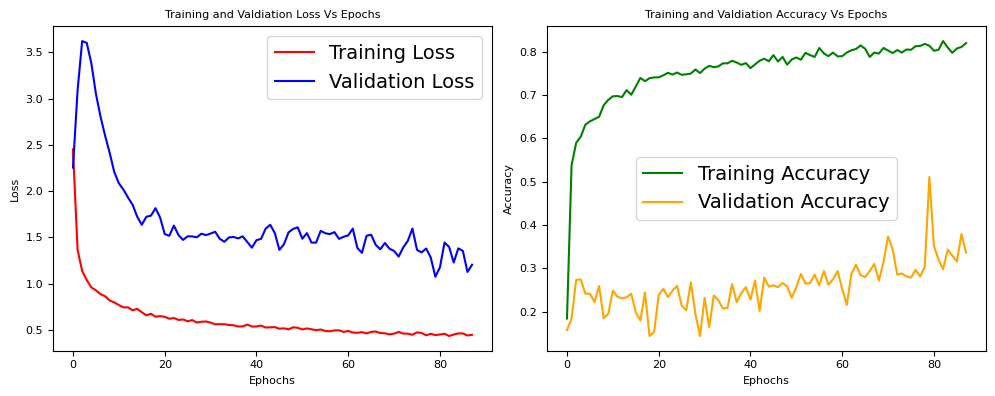

In [44]:
plotGraphs(resultsFinal[0])

#Insights

1. Base model is not able to converge even with 200 epochs, but the modified model is able to converge withing 30 epochs- Accuracy for the base model does not improve even with 200 epochs.
2. Even after trying various models with different hyperparameters, we are not able to achieve very good accuracy because we have a very small set of input dataset to train the model with.


# PART- B

## 1. Data Import and Exploration [5 Marks]


### A. Read the .h5 file and assign to a variable. [2 Marks]

In [26]:
import h5py
h5_file = h5py.File('/content/drive/MyDrive/Colab Notebooks/DeepLearning/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')



### B. Print all the keys from the .h5 file. [1 Marks]


In [27]:
list(h5_file.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

### C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [28]:
X_test_b_o, X_train_b_o, X_val_b_o, y_test_b_o, y_train_b_o, y_val_b_o = h5_file['X_test'][:], h5_file['X_train'][:], h5_file['X_val'][:], h5_file['y_test'][:], h5_file['y_train'][:], h5_file['y_val'][:]



## 2. Data Visualisation and preprocessing [13 Marks]

### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

In [48]:
print(X_train_b_o.shape)
print(y_train_b_o.shape)
print(X_test_b_o.shape)
print(y_test_b_o.shape)

#Train set have 420000 rows in both X and y
#Train set have 180000 rows in both X and y

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


### B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

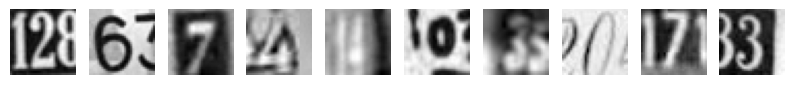

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [49]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train_b_o[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train_b_o[0:10]))

### C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

In [30]:
# Convert the reshaped dataset to a pandas DataFrame
X_train_df = pd.DataFrame(X_train_b_o.reshape(X_train_b_o.shape[0], -1))
X_test_df = pd.DataFrame(X_test_b_o.reshape(X_test_b_o.shape[0], -1))
X_val_df = pd.DataFrame(X_val_b_o.reshape(X_val_b_o.shape[0], -1))
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

In [31]:
print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train_df.astype('float32')
X_val = X_val_df.astype('float32')
X_test = X_test_df.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------


In [32]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [51]:
#using one-hot encoding to convert the target variables
y_train = to_categorical(y_train_b_o)
y_val = to_categorical(y_val_b_o)
y_test = to_categorical(y_test_b_o)

### F. Print total Number of classes in the Dataset. [1 Marks]

In [52]:
y_test.shape
#there are 10 unique classes

(18000, 10)

## 3. Model Training & Evaluation using Neural Network [12 Marks]


### A. Design a Neural Network to train a classifier. [3 Marks]


In [38]:
#trying 3 different models with different neurons in the first layer
models_b =[]
models_b.append({'modelName':'M1_1Layer_256_ADAM','model':createModel (X_train, 256,0.2 ,[[256,0.2],[128,0.2],[64,0.2]], 0.0001, 'ADAM',10)})


### B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

In [39]:
#resutls for the 3 models
results_b=TestModels(X_train, y_train,X_test, y_test, models_b, 5000, 1000, 0.2, callback)


##############################M1_1Layer_256_ADAM Batch Size: 5000 Epochs: 1000 valdiationPercentage:0.2##############################

563/563 [==============================] - 2s 3ms/step - loss: 0.5501 - accuracy: 0.8315


### C. Evaluate performance of the model with appropriate metrics. [2 Marks]

In [59]:
# Evaluate the model
model= models_b[0].get("model")
#y_pred = model.predict(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)


563/563 [==============================] - 2s 4ms/step


### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]

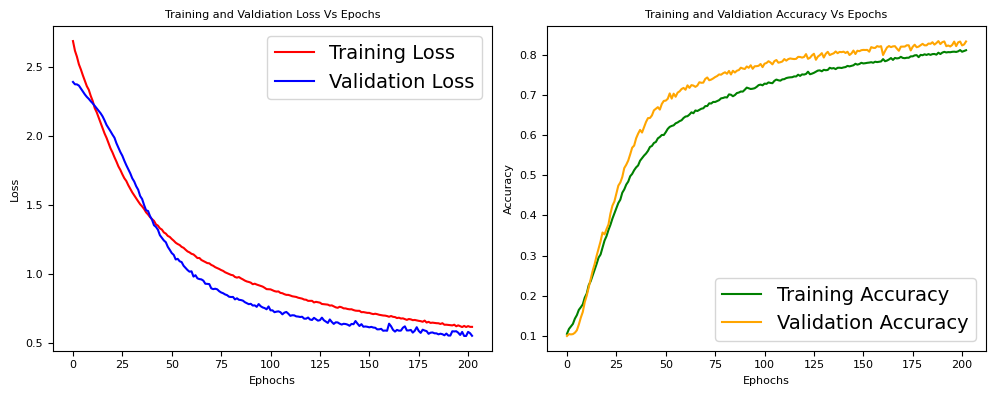

In [65]:
plotGraphs(results_b[0])

The final training accuracy is 83.5% which is almost same as Training and Validation Accuracy. ADAM optimiser with Drop out and Batch normalisation techniques with 3 hidden layers worked best. Batch Size of 5000 was found optimum.
